In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector

conn = mysql.connector.connect(host = "localhost",
                              username = "root",
                              password = "221006",
                              database = "ecommerce")
cur = conn.cursor()

## Basic Level Questions : 

#### Q1. List all unique cities where customers are located.

In [2]:
query = """ select distinct customer_city as unique_cities
from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#### Q2. Count the number of orders placed in 2017.

In [3]:
query = """ select year(order_purchase_timestamp) as year, count(order_id) as `No of orders`
from orders
group by year
having year = 2017 """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are ", data[0][1]

('Total orders placed in 2017 are ', 45101)

#### Q3. Find the total sales per category.

In [4]:
query = """ select p.product_category as category, round(sum(py.payment_value)) as sales
from products p 
join order_items
on p.product_id = order_items.product_id 
join payments py
on py.order_id = order_items.order_id
group by p.product_category """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'Sales'])
df.head()

,Category,Sales
0,perfumery,506739.0
1,Furniture Decoration,1430176.0
2,telephony,486882.0
3,bed table bath,1712554.0
4,automotive,852294.0


C:\Users\User\AppData\Local\Temp\ipykernel_15072\2003702622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.Category, y= df.Sales, data = df, palette = 'viridis')


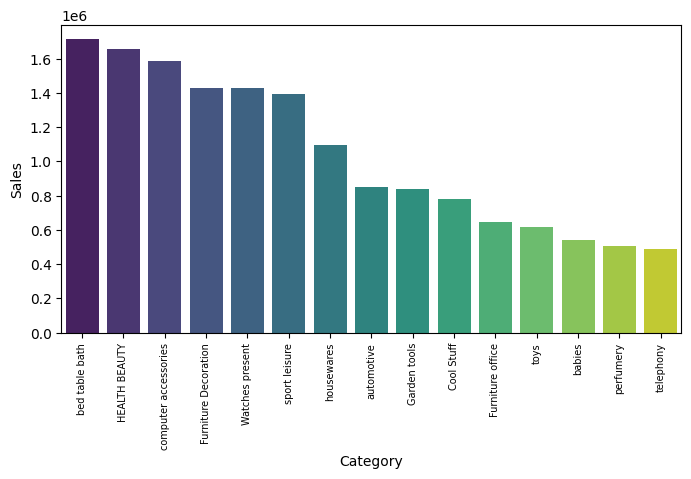

In [5]:
df = df.sort_values(by = 'Sales', ascending = False).head(15)
plt.figure(figsize = (8,4))
sns.barplot(x = df.Category, y= df.Sales, data = df, palette = 'viridis')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

#### Q4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select sum(case when payment_installments >=1 then 1 else 0 end) / count(*) *100 as `% of order_installment`
from payments """

cur.execute(query)
data = cur.fetchall()

"The percentage of orders that were paid in installment is ", data[0][0]

('The percentage of orders that were paid in installment is ',
 Decimal('99.9981'))

#### Q5. Count the number of customers from each state. 

In [7]:
query = """ select customer_state as state, count(*) as customer_count 
from customers
group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['State', 'Customer_count'])
df.head()

,State,Customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852


C:\Users\User\AppData\Local\Temp\ipykernel_15072\477789277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.State, y= df.Customer_count, data = df, palette = 'CMRmap')


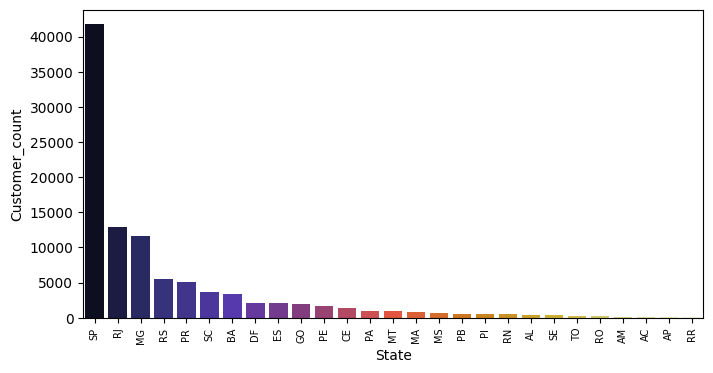

In [8]:
df = df.sort_values(by = 'Customer_count', ascending = False)
plt.figure(figsize = (8,4))
sns.barplot(x = df.State, y= df.Customer_count, data = df, palette = 'CMRmap')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

## Intermediate Level Question

#### Q1. Calculate the number of orders per month in 2018.

In [9]:
query = """ select monthname(order_purchase_timestamp) as month_name, count(*) as order_count
from orders
where year(order_purchase_timestamp) = 2018
Group by month_name """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Month', 'order_count'])
df.head()

,Month,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211


C:\Users\User\AppData\Local\Temp\ipykernel_15072\3705355133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df.Month, y= df.order_count, data = df, order = o, palette = 'viridis')


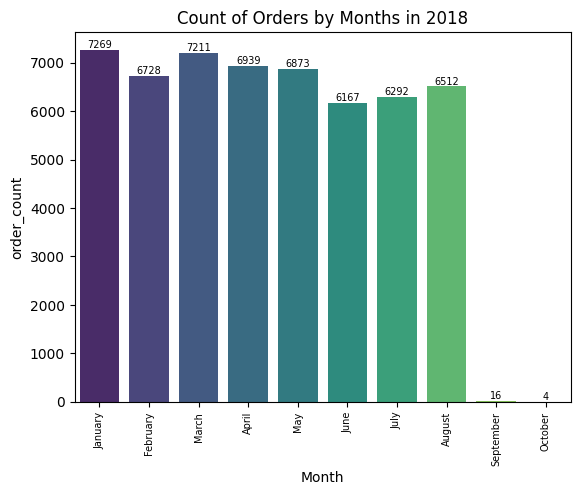

In [10]:
o = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October']
ax = sns.barplot(x = df.Month, y= df.order_count, data = df, order = o, palette = 'viridis')
plt.xticks(rotation = 90, fontsize = 7)
for container in ax.containers:
    ax.bar_label(container, fontsize = 7)
plt.title("Count of Orders by Months in 2018")
plt.show()

#### Q2. Find the average number of products per order, grouped by customer city.

In [11]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as order_count
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city as city, round(avg(count_per_order.order_count),2) as Average_per_order
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by city order by Average_per_order desc"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['City', 'Average_products/order'])
df.head()

,City,Average_products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00


#### Q3. Calculate the percentage of total revenue contributed by each product category.

In [12]:
query = """ select products.product_category as category, round(sum(payments.payment_value)/(select sum(payment_value) from payments) *100, 2) as `sales_%`
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by `sales_%` Desc """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'percentage_distribution'])
df.head()

,Category,percentage_distribution
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93


#### Q4. Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query = """
select products.product_category as Category, count(order_items.product_id) as product_count, round(avg(order_items.price),2) as Price
from products join order_items
on products.product_id = order_items.product_id
group by Category """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'order_count', 'price'])
df.head()

,Category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [14]:
arr1 = df.order_count
arr2 = df.price

a = np.corrcoef([arr1, arr2])
print("The correlation between product price and the number of times a product has been purchased is", a[0][-1])

The correlation between product price and the number of times a product has been purchased is -0.10631514167157562


#### Q5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [15]:
query = """ select * , dense_rank() over(order by revenue desc) as ranking from
(select order_items.seller_id, sum(payments.payment_value) as Revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['seller_id', 'Revenue', 'Ranking'])
df = df.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_15072\2967030988.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'seller_id', y = 'Revenue', palette= 'Blues_r')


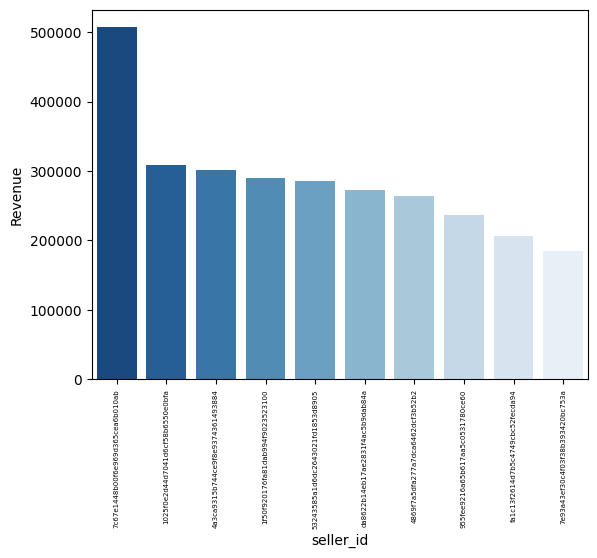

In [21]:
sns.barplot(data = df, x = 'seller_id', y = 'Revenue', palette= 'Blues_r')
plt.xticks(rotation = 90, fontsize = 5)
plt.show()

## Advance Level Questions

#### Q1. Calculate the moving average of order values for each customer over their order history.

In [24]:
query = """ select customer_id, order_purchase_timestamp, payment, avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from orders join payments
on orders.order_id = payments.order_id) as a """

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ['customer_id', 'Order_timestamp', 'Payment', 'Avg_payement'])
df.head()

,customer_id,Order_timestamp,Payment,Avg_payement
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


#### Q2. Calculate the cumulative sales per month for each year.

In [28]:
query = """ select years, months, sales, sum(sales) over(order by years, months) as cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months, round(sum(payments.payment_value),2) as sales
from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a """

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ['year', 'month', 'sales', 'cumulative_sales'])
df.head()

,year,month,sales,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


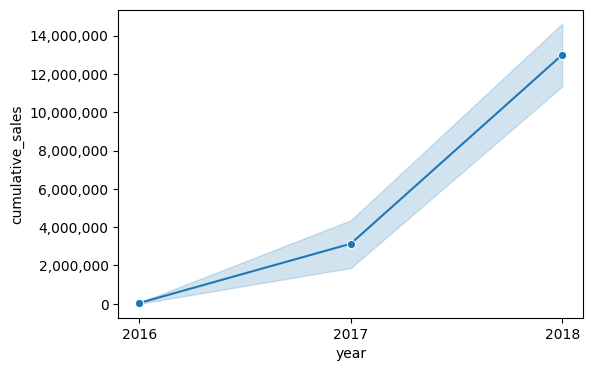

In [36]:
import matplotlib.ticker as ticker

plt.figure(figsize = (6,4))
df['year'] = df['year'].astype(str)
sns.lineplot(data=df, x='year', y='cumulative_sales', marker = 'o')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

#### Q3. Calculate the year-over-year growth rate of total sales.

In [38]:
query = """ select years, round(((sales - lag(sales, 1) over(order by years)) / lag(sales, 1) over(order by years)) *100, 2)
from
(select year(orders.order_purchase_timestamp) as years, sum(payments.payment_value) as sales
from orders join payments
on orders.order_id = payments.order_id
group by years order by years) as a """

cur.execute(query)

data = cur.fetchall()
data

df = pd.DataFrame(data, columns = ['year', 'yoy % growth'])
df.head()

,year,yoy % growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


#### Q4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [43]:
query = """ with a as (select customers.customer_id, min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select (count(distinct a.customer_id) / count(distinct b.customer_id)) * 100 as `retention_%`
from a left join b
on a.customer_id = b.customer_id """

cur.execute(query)

data = cur.fetchall()
data
print("we don't have any repeated customers who make another purchase within 6 months of their first purchase : ", data)

we don't have any repeated customers who make another purchase within 6 months of their first purchase :  [(None,)]


#### Q5. Identify the top 3 customers who spent the most money in each year.

In [48]:
query = """ select years, customer_id, payment, ranking
from
(select year(orders.order_purchase_timestamp) as years, orders.customer_id, round(sum(payments.payment_value),2) as payment, 
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as ranking
from orders join payments
on orders.order_id = payments.order_id
group by years, orders.customer_id) as a
where ranking <= 3 """

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ['year', 'customer_id', 'payment', 'rank'])
df.head()

,year,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2


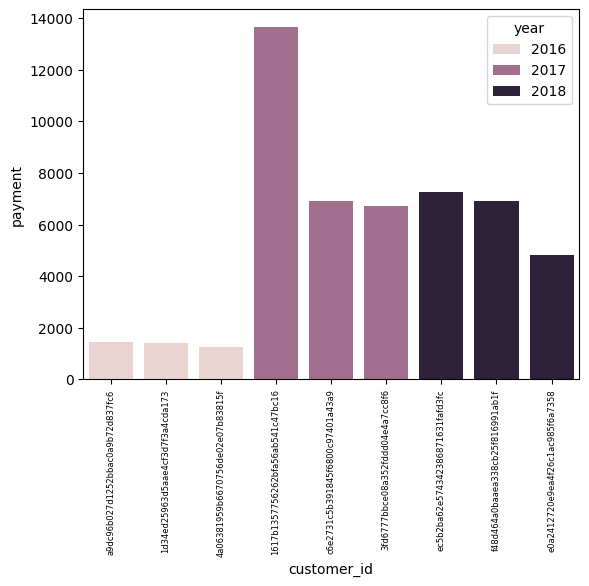

In [50]:
sns.barplot(data = df, x = 'customer_id', y = 'payment', hue = 'year')
plt.xticks(rotation = 90, fontsize = 6)
plt.show()